In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\data.csv')

In [208]:
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [210]:
df.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,918.000000,9.180000e+02,9.180000e+02,9.180000e+02
mean,458.500000,1.677469e+08,2.301434e+08,3.968668e+08
std,265.148072,1.040360e+08,2.176011e+08,3.082629e+08
min,0.000000,8.036084e+07,2.600000e+02,8.160000e+07
25%,229.250000,1.016071e+08,8.845620e+07,2.005564e+08
50%,458.500000,1.321351e+08,1.638819e+08,3.019416e+08
75%,687.750000,1.913905e+08,2.885577e+08,4.750718e+08
max,917.000000,9.366622e+08,2.086739e+09,2.847246e+09


In [211]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [212]:
df

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [213]:
df.isnull().sum()

Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [214]:
df1 = df.dropna(axis = 0)

In [215]:
df1

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
...,...,...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",1 hr 43 min,PG
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [216]:
df1.isnull().sum()

Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
dtype: int64

In [217]:
df1['Movie Runtime'].unique()

array(['2 hr 18 min', '3 hr 1 min', '2 hr 42 min', '3 hr 14 min',
       '2 hr 4 min', '2 hr 23 min', '2 hr 32 min', '1 hr 58 min',
       '2 hr 13 min', '2 hr 21 min', '2 hr 9 min', '1 hr 43 min',
       '2 hr 16 min', '2 hr 1 min', '2 hr 44 min', '1 hr 33 min',
       '1 hr 55 min', '1 hr 40 min', '2 hr 3 min', '2 hr 26 min',
       '2 hr 31 min', '1 hr 28 min', '2 hr 8 min', '2 hr 10 min',
       '2 hr 27 min', '2 hr 22 min', '1 hr 59 min', '2 hr 7 min',
       '2 hr 29 min', '1 hr 42 min', '2 hr 20 min', '3 hr 21 min',
       '1 hr 27 min', '1 hr 38 min', '1 hr 46 min', '1 hr 48 min',
       '1 hr 35 min', '2 hr 17 min', '2 hr 34 min', '2 hr 59 min',
       '2 hr 19 min', '1 hr 31 min', '2 hr 2 min', '2 hr 15 min',
       '2 hr 24 min', '2 hr 6 min', '2 hr 58 min', '2 hr 49 min',
       '2 hr 11 min', '2 hr 25 min', '2 hr 33 min', '1 hr 47 min',
       '1 hr 36 min', '2 hr 28 min', '1 hr 32 min', '2 hr 37 min',
       '1 hr 57 min', '1 hr 25 min', '1 hr 30 min', '1 hr 29 min',
    

In [218]:
df1

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
...,...,...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",1 hr 43 min,PG
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [219]:
regex=r'^[0-9]'
df1['hours'] = df1['Movie Runtime'].apply(lambda x : re.findall(regex, x))

In [220]:
df1.hours = df1['hours'].apply(lambda x : ''.join(x))

In [221]:
df1['hours'] = df1['hours'].astype('int')

In [222]:
df1['hours'] = df1['hours']*60

In [223]:
regex=r'[0-9]+[0-9]'
df1['mins'] = df1['Movie Runtime'].apply(lambda x : re.findall(regex, x))

In [224]:
df1.mins = df1['mins'].apply(lambda x : ''.join(x))

In [225]:
df1['mins'].replace(to_replace="",value="0",inplace=True)

In [226]:
df1['mins'] = df1['mins'].astype('int')

In [227]:
df1['duration'] = df1['hours'] + df1['mins']

In [228]:
regex=r'[0-9]+[0-9]+[0-9]+[0-9]'
df1['Release year'] = df1['Release Date'].apply(lambda x : re.findall(regex, x))

In [229]:
df1['Release year'] = df1['Release year'].apply(lambda x : ''.join(x))

In [230]:
df1['Release year'] = df1['Release year'].astype('int')

In [236]:
regex=r'[^(0-9),]+[a-zA-Z0-9]'
df1['title'] = df1['Title'].apply(lambda x : re.findall(regex, x))

In [238]:
df1['title'] = df1['title'].apply(lambda x : ''.join(x))

In [239]:
df1

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,hours,mins,duration,Release year,title
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,120,18,138,2015,Star Wars: Episode VII - The Force Awakens
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,180,0,180,2019,Avengers: Endgame
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,120,42,162,2009,Avatar
6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,180,14,194,1997,Titanic
7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,120,0,120,2015,Jurassic World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",1 hr 43 min,PG,60,43,103,1995,While You Were Sleeping
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13,120,0,120,2004,The Notebook
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13,120,13,133,2010,Eat Pray Love
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R,60,38,98,2003,The Texas Chainsaw Massacre


In [233]:
df1

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,hours,mins,duration,Release year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,120,18,138,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,180,0,180,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,120,42,162,2009
6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,180,14,194,1997
7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,120,0,120,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",1 hr 43 min,PG,60,43,103,1995
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13,120,0,120,2004
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13,120,13,133,2010
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R,60,38,98,2003


In [240]:
df2 = df1.drop(['Title','Movie Runtime','hours','mins','Release Date'],axis = 1)

In [241]:
df2

,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,duration,Release year,title
0,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",PG-13,138,2015,Star Wars: Episode VII - The Force Awakens
1,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",PG-13,180,2019,Avengers: Endgame
2,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG-13,162,2009,Avatar
6,A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,659363944,1542283320,2201647264,"['Drama', 'Romance']",PG-13,194,1997,Titanic
7,"A new theme park, built on the original site o...",Universal Pictures,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",PG-13,120,2015,Jurassic World
...,...,...,...,...,...,...,...,...,...,...
911,A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",PG,103,1995,While You Were Sleeping
913,A poor yet passionate young man falls in love ...,New Line Cinema,81001787,36813370,117815157,"['Drama', 'Romance']",PG-13,120,2004,The Notebook
915,A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",PG-13,133,2010,Eat Pray Love
916,After picking up a traumatized young hitchhike...,New Line Cinema,80571655,26792250,107363905,"['Crime', 'Horror']",R,98,2003,The Texas Chainsaw Massacre


In [243]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Movie Info                  744 non-null    object
 1   Distributor                 744 non-null    object
 2   Domestic Sales (in $)       744 non-null    int64 
 3   International Sales (in $)  744 non-null    int64 
 4   World Sales (in $)          744 non-null    int64 
 5   Genre                       744 non-null    object
 6   License                     744 non-null    object
 7   duration                    744 non-null    int32 
 8   Release year                744 non-null    int32 
 9   title                       744 non-null    object
dtypes: int32(2), int64(3), object(5)
memory usage: 58.1+ KB


In [244]:
data = df2

In [245]:
data

,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,duration,Release year,title
0,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",PG-13,138,2015,Star Wars: Episode VII - The Force Awakens
1,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",PG-13,180,2019,Avengers: Endgame
2,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG-13,162,2009,Avatar
6,A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,659363944,1542283320,2201647264,"['Drama', 'Romance']",PG-13,194,1997,Titanic
7,"A new theme park, built on the original site o...",Universal Pictures,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",PG-13,120,2015,Jurassic World
...,...,...,...,...,...,...,...,...,...,...
911,A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",PG,103,1995,While You Were Sleeping
913,A poor yet passionate young man falls in love ...,New Line Cinema,81001787,36813370,117815157,"['Drama', 'Romance']",PG-13,120,2004,The Notebook
915,A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",PG-13,133,2010,Eat Pray Love
916,After picking up a traumatized young hitchhike...,New Line Cinema,80571655,26792250,107363905,"['Crime', 'Horror']",R,98,2003,The Texas Chainsaw Massacre


### Data Visualization

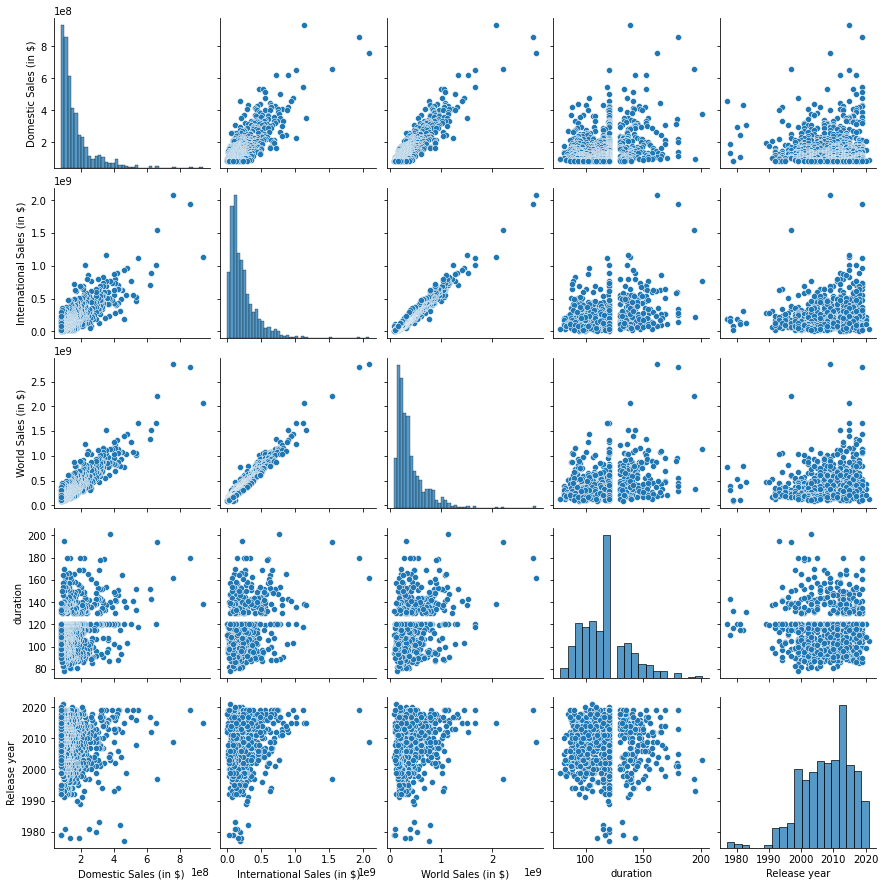

In [260]:
sns.pairplot(data=data)

<AxesSubplot:xlabel='Distributor', ylabel='Domestic Sales (in $)'>

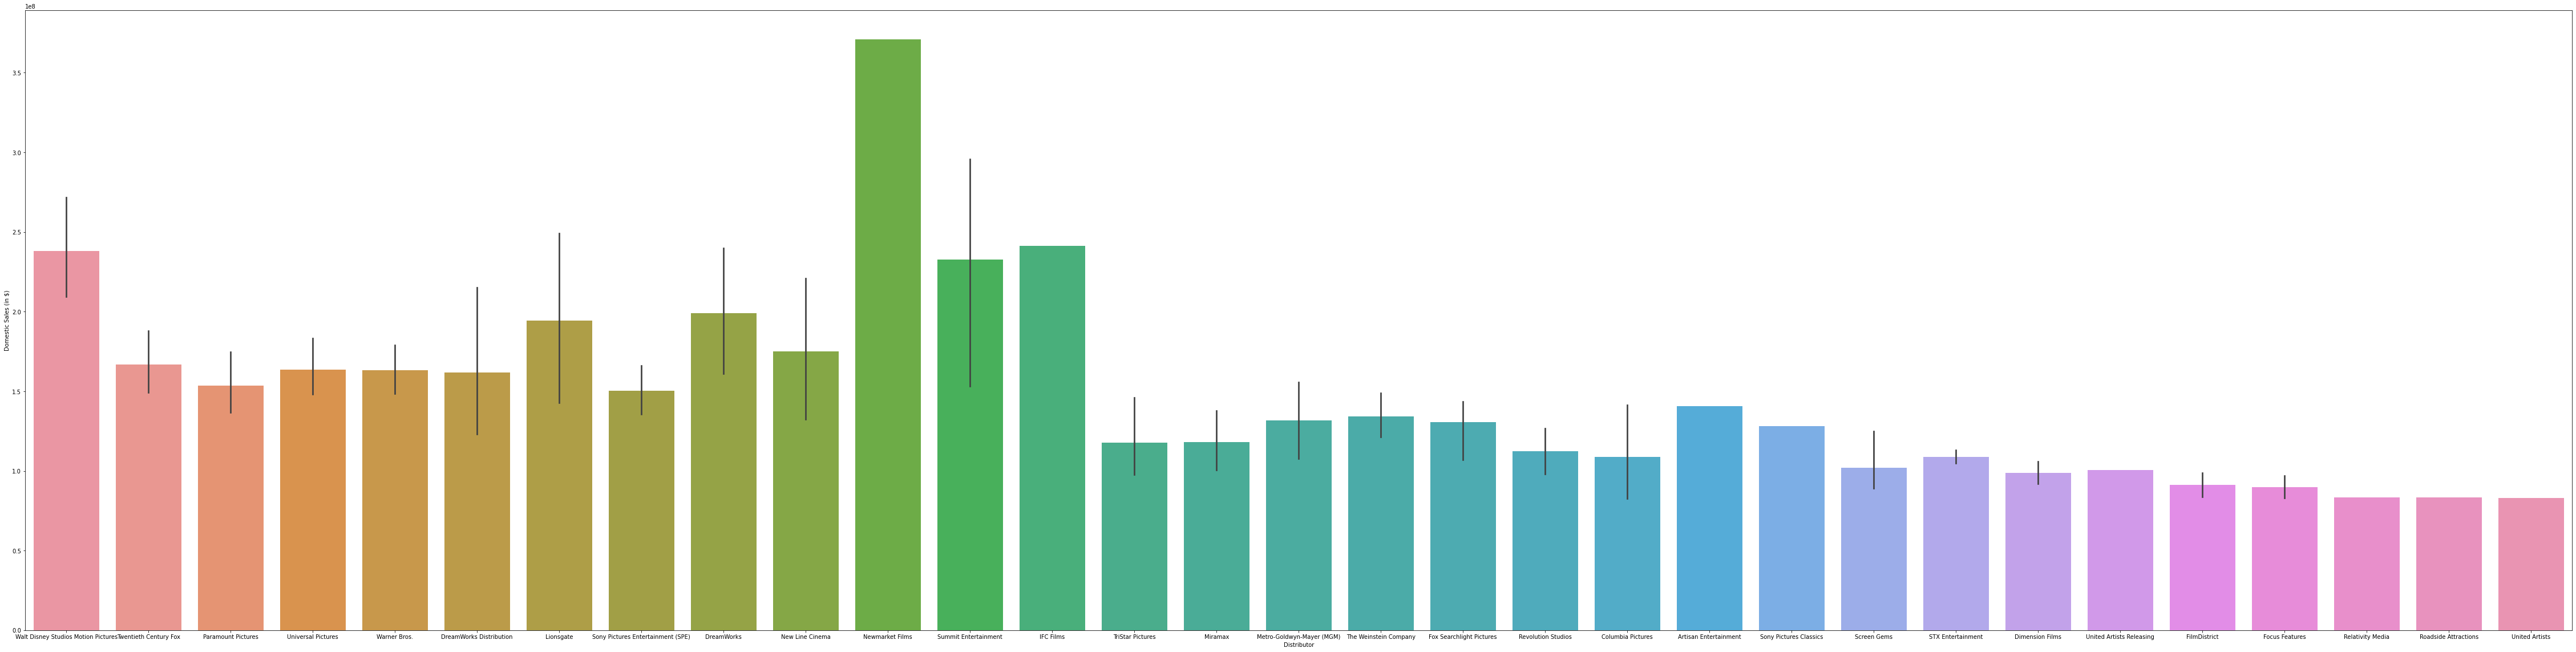

In [283]:
plt.figure(figsize=(80,20))
sns.barplot(data=data,y='Domestic Sales (in $)',x='Distributor')

Here it represents that the NewMarket films have the highest Domestic sales & United Artists has the least

<AxesSubplot:xlabel='Distributor', ylabel='International Sales (in $)'>

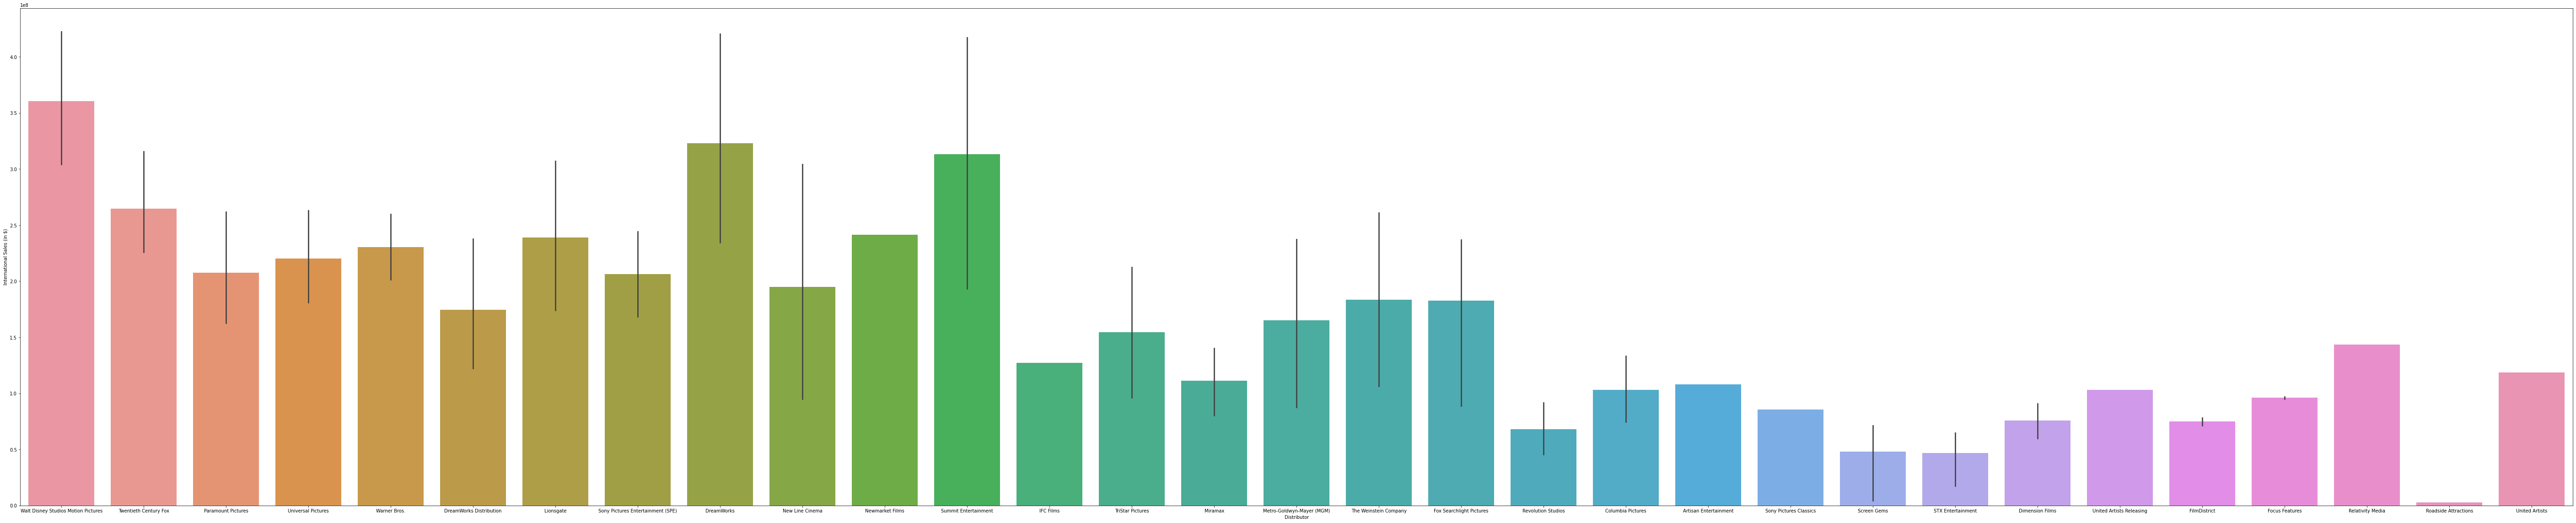

In [286]:
plt.figure(figsize=(100,20))
sns.barplot(data=data,y='International Sales (in $)',x='Distributor')

Here it represents that Walt Disney Studios Motion Pictures have the highest International sales & Roadside Attractions has the least 

<AxesSubplot:xlabel='Distributor', ylabel='World Sales (in $)'>

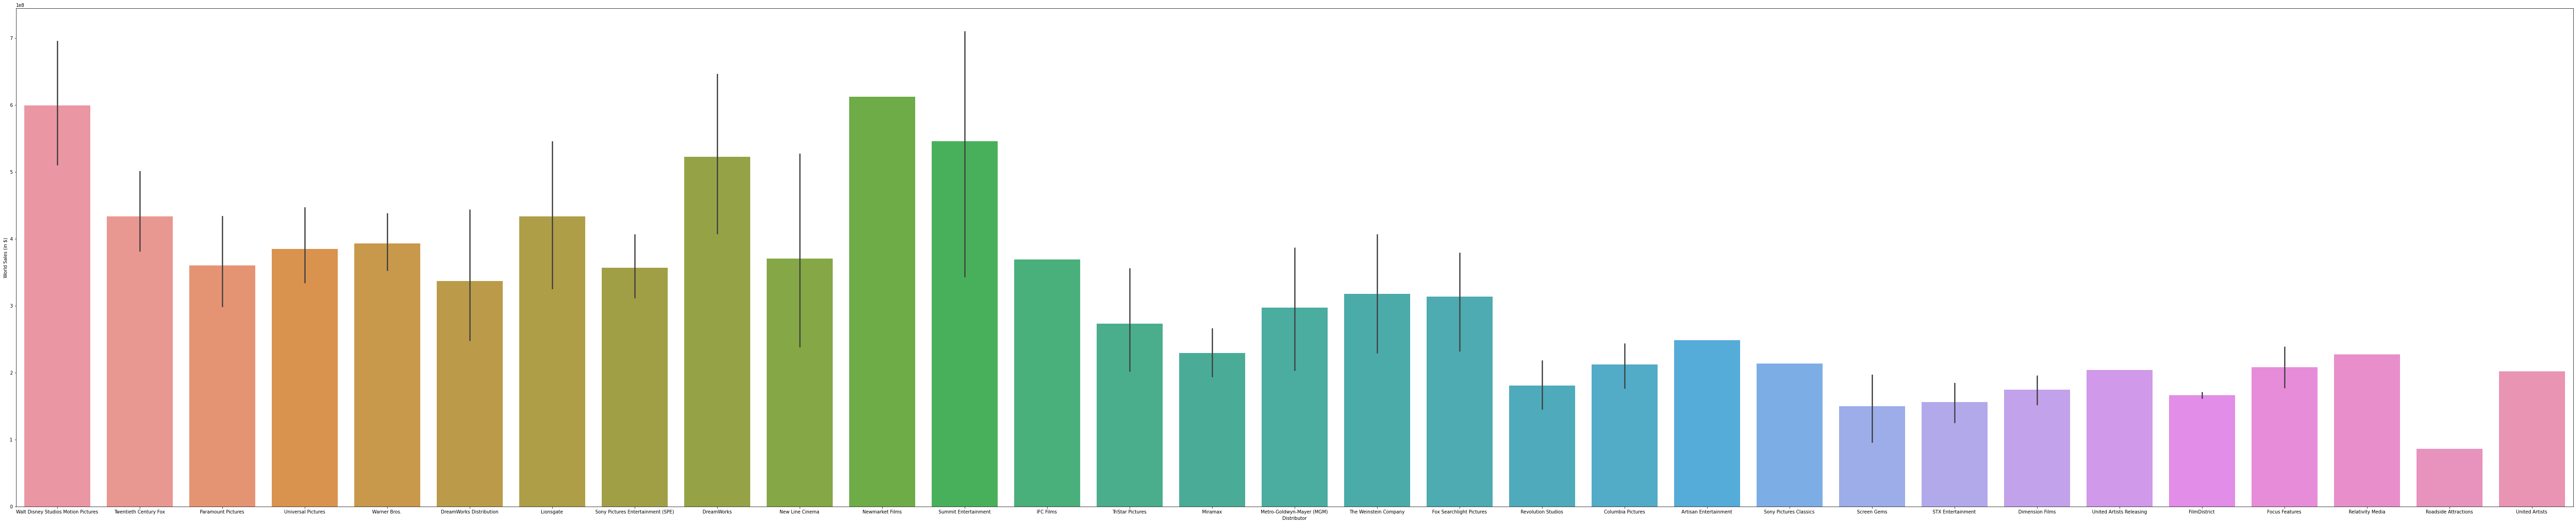

In [287]:
plt.figure(figsize=(100,20))
sns.barplot(data=data,y='World Sales (in $)',x='Distributor')

Here it represents that Summit Entertainment have the highest World sales & Roadside Attractions has the least

<AxesSubplot:xlabel='Domestic Sales (in $)'>

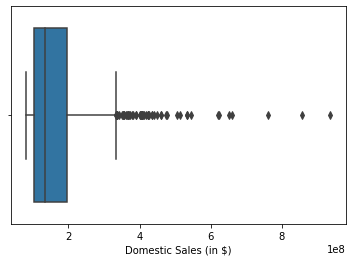

In [277]:
sns.boxplot(data=data,x='Domestic Sales (in $)')

Here it represents that few of the films have generated the huge amount of sales in the country itself

<AxesSubplot:xlabel='International Sales (in $)'>

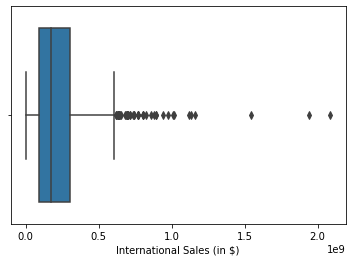

In [278]:
sns.boxplot(data=data,x='International Sales (in $)')

Here it represents very few of the films have crossed the high amount of sales

<AxesSubplot:xlabel='World Sales (in $)'>

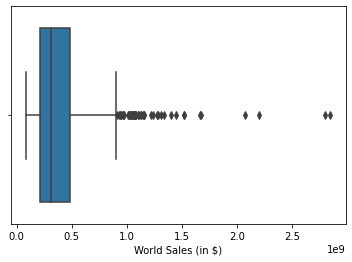

In [279]:
sns.boxplot(data=data,x='World Sales (in $)')

Here it represents very few films have crosed good sales worldwide